## Predicting survivenec of the Breast Cancer 

Breast cancer is a common and serious health concern affecting many individuals, particularly women. Analyzing the breast cancer dataset is crucial for early detection and understanding risk factors, as it can help improve diagnostic accuracy, treatment strategies, and ultimately save lives.


In [1]:
## import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import callbacks
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
##import libraries for ANN
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.models import Sequential

In [2]:
## warning 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
## load the dataset
bcan1 = pd.read_csv('Breast_Cancer.csv')
bcan1

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,41,White,Married,T3,N3,IIIC,Poorly differentiated,3,Regional,140,Positive,Positive,41,15,51,Dead
1,47,White,Married,T3,N2,IIIA,Well differentiated,1,Regional,140,Positive,Positive,23,7,64,Alive
2,49,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,140,Positive,Positive,14,2,48,Alive
3,60,White,Divorced,T3,N2,IIIA,Moderately differentiated,2,Regional,140,Positive,Positive,21,5,57,Alive
4,63,White,Married,T4,N2,IIIB,Moderately differentiated,2,Regional,140,Positive,Positive,9,8,89,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,55,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Negative,18,1,87,Alive
4020,55,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Positive,31,1,59,Alive
4021,58,White,Married,T1,N3,IIIC,Poorly differentiated,3,Regional,1,Positive,Positive,22,22,82,Dead
4022,61,Black,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Positive,4,1,51,Alive


In [4]:
##checking if there is any blank
bcan1.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [5]:
# Checking if there is any duplicates
bcan = bcan1.drop_duplicates()
bcan

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,41,White,Married,T3,N3,IIIC,Poorly differentiated,3,Regional,140,Positive,Positive,41,15,51,Dead
1,47,White,Married,T3,N2,IIIA,Well differentiated,1,Regional,140,Positive,Positive,23,7,64,Alive
2,49,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,140,Positive,Positive,14,2,48,Alive
3,60,White,Divorced,T3,N2,IIIA,Moderately differentiated,2,Regional,140,Positive,Positive,21,5,57,Alive
4,63,White,Married,T4,N2,IIIB,Moderately differentiated,2,Regional,140,Positive,Positive,9,8,89,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,55,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Negative,18,1,87,Alive
4020,55,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Positive,31,1,59,Alive
4021,58,White,Married,T1,N3,IIIC,Poorly differentiated,3,Regional,1,Positive,Positive,22,22,82,Dead
4022,61,Black,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Positive,4,1,51,Alive


There is no blank in the dataset but there was one duplicated row and we removed it.


In [6]:

pd.options.display.float_format = '{:.1f}'.format
bcan1.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.0,4024.0,4024.0,4024.0,4024.0
mean,54.0,30.5,14.4,4.2,71.3
std,9.0,21.1,8.1,5.1,22.9
min,30.0,1.0,1.0,1.0,1.0
25%,47.0,16.0,9.0,1.0,56.0
50%,54.0,25.0,14.0,2.0,73.0
75%,61.0,38.0,19.0,5.0,90.0
max,69.0,140.0,61.0,46.0,107.0


... Mean of Age is 54, the range is 30-69 /// ///
Mean of Tumor size is 30.5 mm the range is  1- 140 mm /// ///
Mean of Survival months is 71.3 months the range is 1- 107 months

In [7]:
print(bcan1.columns)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


## There is another way to check the data, checking blanks, objects and numberss...
Here we can have the informations of our dataset


In [8]:
def check(bcan):
    # Creating an empty list to store columns information
    columns_info = []

    # Iterate through columns
    for col in bcan.columns:
        # Extract column information
        dtypes = bcan[col].dtypes
        nunique = bcan[col].nunique()
        sum_null = bcan[col].isnull().sum()

        # Append the information to the list
        columns_info.append([col, dtypes, nunique, sum_null])

    # Create a DataFrame from the list
    bcan_check = pd.DataFrame(columns_info, columns=['Column', 'Dtype', 'Nunique', 'Sum_Null'])

    return bcan_check

result = check(bcan)
print(result)

                    Column   Dtype  Nunique  Sum_Null
0                      Age   int64       40         0
1                     Race  object        3         0
2           Marital Status  object        5         0
3                 T Stage   object        4         0
4                  N Stage  object        3         0
5                6th Stage  object        5         0
6            differentiate  object        4         0
7                    Grade  object        4         0
8                  A Stage  object        2         0
9               Tumor Size   int64      110         0
10         Estrogen Status  object        2         0
11     Progesterone Status  object        2         0
12  Regional Node Examined   int64       54         0
13   Reginol Node Positive   int64       38         0
14         Survival Months   int64      107         0
15                  Status  object        2         0


# Encoding for some columns:
A number of columns are in categorical so we need to convert them to numerical
"Race", "Marital Status","T Stage","N Stage", "6th Stage", "differentiate Grade", "A Stage", "Tumor Size","Estrogen Status","Progesterone Status","Status"


In [9]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to label encode
categorical_columns = ["Race", "Marital Status", "6th Stage", "differentiate", "A Stage", 
                       "Tumor Size", "Estrogen Status", "Progesterone Status", "Status", "N Stage", "T Stage ", "Grade"]

# Initialize a LabelEncoder for each column
label_encoders = {}
encoded_label_mappings = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    bcan[col] = label_encoders[col].fit_transform(bcan[col])
    # Store mapping for each column
    encoded_label_mappings[col] = dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)))

bcan.head()

# Accessing the encoded label mappings for all columns
for col, mapping in encoded_label_mappings.items():
    print(f"Encoded Label Mapping for '{col}':")
    print(mapping)


Encoded Label Mapping for 'Race':
{'Black': 0, 'Other': 1, 'White': 2}
Encoded Label Mapping for 'Marital Status':
{'Divorced': 0, 'Married': 1, 'Separated': 2, 'Single ': 3, 'Widowed': 4}
Encoded Label Mapping for '6th Stage':
{'IIA': 0, 'IIB': 1, 'IIIA': 2, 'IIIB': 3, 'IIIC': 4}
Encoded Label Mapping for 'differentiate':
{'Moderately differentiated': 0, 'Poorly differentiated': 1, 'Undifferentiated': 2, 'Well differentiated': 3}
Encoded Label Mapping for 'A Stage':
{'Distant': 0, 'Regional': 1}
Encoded Label Mapping for 'Tumor Size':
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 

Encoded Label Mapping for 'Race':
{'Black': 0, 'Other': 1, 'White': 2}

Encoded Label Mapping for 'Marital Status':
{'Divorced': 0, 'Married': 1, 'Separated': 2, 'Single ': 3, 'Widowed': 4}

Encoded Label Mapping for '6th Stage':
{'IIA': 0, 'IIB': 1, 'IIIA': 2, 'IIIB': 3, 'IIIC': 4}

Encoded Label Mapping for 'differentiate':
{'Moderately differentiated': 0, 'Poorly differentiated': 1, 'Undifferentiated': 2, 'Well differentiated': 3}

Encoded Label Mapping for 'A Stage':
{'Distant': 0, 'Regional': 1}

Encoded Label Mapping for 'Tumor Size':
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 72: 70, 73: 71, 74: 72, 75: 73, 76: 74, 77: 75, 78: 76, 79: 77, 80: 78, 81: 79, 82: 80, 83: 81, 84: 82, 85: 83, 86: 84, 87: 85, 88: 86, 90: 87, 92: 88, 94: 89, 95: 90, 96: 91, 97: 92, 98: 93, 100: 94, 101: 95, 103: 96, 104: 97, 105: 98, 107: 99, 108: 100, 110: 101, 115: 102, 117: 103, 120: 104, 123: 105, 125: 106, 130: 107, 133: 108, 140: 109}

Encoded Label Mapping for 'Estrogen Status':
{'Negative': 0, 'Positive': 1}

Encoded Label Mapping for 'Progesterone Status':
{'Negative': 0, 'Positive': 1}

Encoded Label Mapping for 'Status':
{'Alive': 0, 'Dead': 1}

Encoded Label Mapping for 'N Stage':
{'N1': 0, 'N2': 1, 'N3': 2}

Encoded Label Mapping for 'T Stage ':
{'T1': 0, 'T2': 1, 'T3': 2, 'T4': 3}

Encoded Label Mapping for 'Grade':
{' anaplastic; Grade IV': 0, '1': 1, '2': 2, '3': 3}


In [10]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to label encode
categorical_columns = ["Race", "Marital Status", "6th Stage", "differentiate", "A Stage", 
                       "Tumor Size", "Estrogen Status", "Progesterone Status", "Status", "N Stage", "T Stage ", "Grade" ]

# Initialize a LabelEncoder for each column
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    bcan[col] = label_encoders[col].fit_transform(bcan[col])

bcan.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,41,2,1,2,2,4,1,3,1,109,1,1,41,15,51,1
1,47,2,1,2,1,2,3,1,1,109,1,1,23,7,64,0
2,49,2,1,2,0,2,0,2,1,109,1,1,14,2,48,0
3,60,2,0,2,1,2,0,2,1,109,1,1,21,5,57,0
4,63,2,1,3,1,3,0,2,1,109,1,1,9,8,89,0


In [11]:
####Exploratory data analysis---Plotting HEATMAP---Correlation data
# Create a heatmap
## Here I want to see the corr-mat in table as it is  little clearer for the numbers
corr_mat = bcan.corr(numeric_only=True)
pd.options.display.float_format = '{:.1f}'.format
corr_mat

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
Age,1.0,0.1,0.1,-0.1,0.0,-0.0,0.0,-0.1,0.0,-0.1,0.1,-0.0,-0.0,0.0,-0.0,0.1
Race,0.1,1.0,-0.1,0.0,-0.0,-0.0,-0.0,-0.1,0.0,-0.0,0.1,0.0,-0.0,-0.0,0.0,-0.1
Marital Status,0.1,-0.1,1.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
T Stage,-0.1,0.0,0.0,1.0,0.3,0.6,-0.0,0.1,-0.2,0.8,-0.1,-0.1,0.1,0.2,-0.1,0.2
N Stage,0.0,-0.0,0.0,0.3,1.0,0.9,-0.0,0.1,-0.3,0.3,-0.1,-0.1,0.3,0.8,-0.1,0.3
6th Stage,-0.0,-0.0,0.0,0.6,0.9,1.0,-0.0,0.2,-0.3,0.5,-0.1,-0.1,0.3,0.8,-0.1,0.3
differentiate,0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0,-0.4,-0.0,-0.0,-0.0,0.0,-0.1,-0.0,-0.0,-0.0
Grade,-0.1,-0.1,-0.0,0.1,0.1,0.2,-0.4,1.0,-0.0,0.1,-0.2,-0.2,0.1,0.1,-0.1,0.1
A Stage,0.0,0.0,0.0,-0.2,-0.3,-0.3,-0.0,-0.0,1.0,-0.1,0.1,0.0,-0.1,-0.2,0.1,-0.1
Tumor Size,-0.1,-0.0,0.0,0.8,0.3,0.5,-0.0,0.1,-0.1,1.0,-0.1,-0.1,0.1,0.2,-0.1,0.1


In [12]:
print(corr_mat)


                        Age  Race  Marital Status  T Stage   N Stage  \
Age                     1.0   0.1             0.1      -0.1      0.0   
Race                    0.1   1.0            -0.1       0.0     -0.0   
Marital Status          0.1  -0.1             1.0       0.0      0.0   
T Stage                -0.1   0.0             0.0       1.0      0.3   
N Stage                 0.0  -0.0             0.0       0.3      1.0   
6th Stage              -0.0  -0.0             0.0       0.6      0.9   
differentiate           0.0  -0.0             0.0      -0.0     -0.0   
Grade                  -0.1  -0.1            -0.0       0.1      0.1   
A Stage                 0.0   0.0             0.0      -0.2     -0.3   
Tumor Size             -0.1  -0.0             0.0       0.8      0.3   
Estrogen Status         0.1   0.1            -0.0      -0.1     -0.1   
Progesterone Status    -0.0   0.0            -0.0      -0.1     -0.1   
Regional Node Examined -0.0  -0.0            -0.0       0.1     

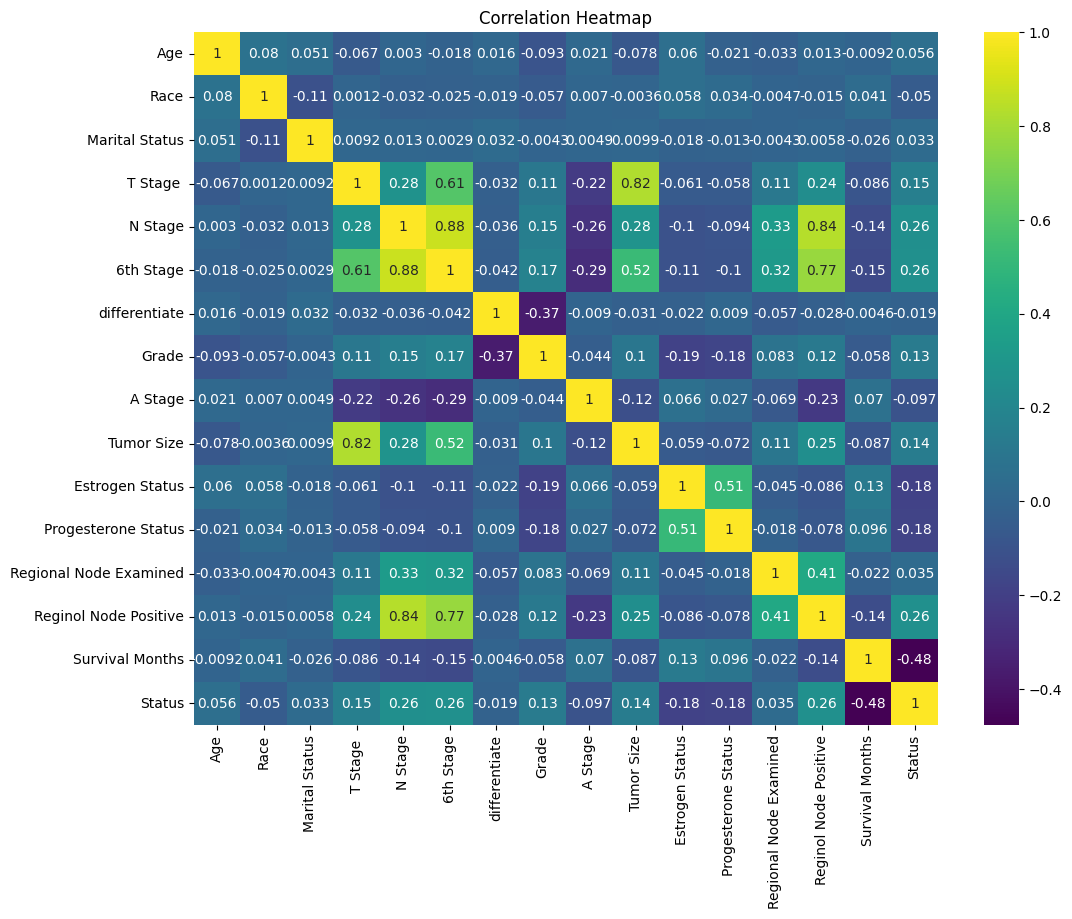

In [13]:
## Plot the heatmap

corr_mat = bcan.corr(numeric_only = True)
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, annot=True, cmap=sns.color_palette("viridis", as_cmap=True))
plt.title("Correlation Heatmap")

plt.show()

# Making the Model

In [14]:
bcan.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,41,2,1,2,2,4,1,3,1,109,1,1,41,15,51,1
1,47,2,1,2,1,2,3,1,1,109,1,1,23,7,64,0
2,49,2,1,2,0,2,0,2,1,109,1,1,14,2,48,0
3,60,2,0,2,1,2,0,2,1,109,1,1,21,5,57,0
4,63,2,1,3,1,3,0,2,1,109,1,1,9,8,89,0


In [15]:
## Create variables, columns 0 to 14 are the features and column 15 which is Statuse is our Target or dependent feature
x = bcan.iloc[:, 0:15]
y = bcan.iloc[:, 15]

In [16]:
x

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,41,2,1,2,2,4,1,3,1,109,1,1,41,15,51
1,47,2,1,2,1,2,3,1,1,109,1,1,23,7,64
2,49,2,1,2,0,2,0,2,1,109,1,1,14,2,48
3,60,2,0,2,1,2,0,2,1,109,1,1,21,5,57
4,63,2,1,3,1,3,0,2,1,109,1,1,9,8,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,55,2,1,0,0,0,0,2,1,0,1,0,18,1,87
4020,55,2,1,0,0,0,0,2,1,0,1,1,31,1,59
4021,58,2,1,0,2,4,1,3,1,0,1,1,22,22,82
4022,61,0,1,0,0,0,0,2,1,0,1,1,4,1,51


In [17]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4019    0
4020    0
4021    1
4022    0
4023    0
Name: Status, Length: 4023, dtype: int64

In [18]:
## splitting our data
## 80 % training 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
## standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
## LOGISTIC REGRESSION
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log= log_reg.predict(x_test)

In [21]:
# create a dataframe for prediction
pd.DataFrame({'Actual': y_test, 'Predited':y_pred_log}).sample(10)

,Actual,Predited
2459,0,0
3653,0,0
1898,0,0
4021,1,0
720,1,1
1200,1,1
1426,0,0
1874,0,0
2883,0,0
2124,1,0


In [22]:
## model evaluation

accuracy_Log_reg = accuracy_score(y_test, y_pred_log )

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_log)

print('Accuracy_Log_Reg', (metrics.accuracy_score(y_test, y_pred_log))*100, '%')
print(accuracy_Log_reg)
print(conf_mat)


Accuracy_Log_Reg 89.68944099378882 %
0.8968944099378882
[[652  20]
 [ 63  70]]


In [23]:
## classification report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       672
           1       0.78      0.53      0.63       133

    accuracy                           0.90       805
   macro avg       0.84      0.75      0.78       805
weighted avg       0.89      0.90      0.89       805



Precision is the ratio of true positive predictions to the total predicted positives. Here, Precision for class 0 is 0.91, meaning that when the model predicts a sample as not having cancer is correct 91% of the time. Precision for class 1 is 0.78, indicating that when the model predicts a sample as having breast cancer (class 1), it is correct 76% of the time.
Recall is the ratio of true positive predictions to the total actual positives. we see,Recall for class 0 is 0.97, meaning that the model correctly identifies 97% of the actual samples that do not have breast cancer.Recall for class 1 is 0.63, indicating that the model captures 63% of the actual samples that have breast cancer. The accuracy is the ratio of correctly predicted samples to the total samples. In this case, the accuracy is 0.896, or almost 90%, indicating that the model correctly predicts the class for 90% of the samples.

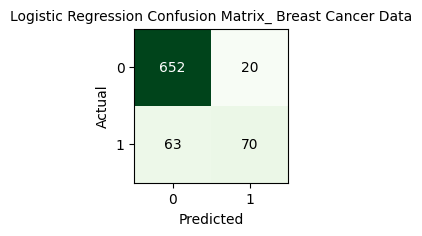

In [24]:
## confusion matrix plot
conf_mat = confusion_matrix(y_test, y_pred_log)
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Logistic Regression Confusion Matrix_ Breast Cancer Data', fontsize = 10)
plt.show()


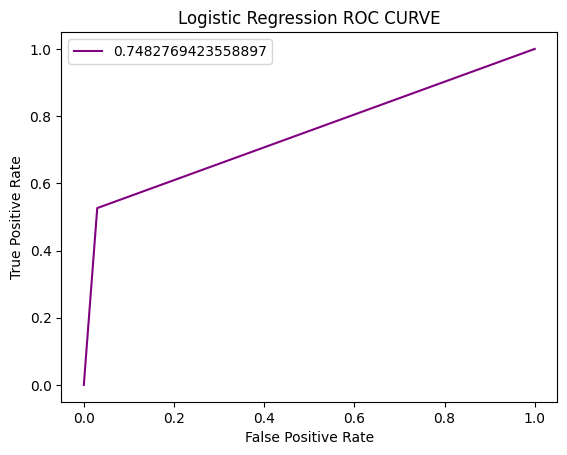

In [25]:
## Accuracy 
auc_LR = roc_auc_score(y_test, y_pred_log)
fpr, tpr, _ = roc_curve(y_test, y_pred_log)
plt.plot(fpr, tpr, color = 'purple', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC CURVE')
plt.legend()
plt.show()

##%  Logistic Regression of combination of all features shows 89.7 % of accuracy

Tunning the Threshold to increase the 
The decision threshold is the probability threshold above which the model predicts the positive class (class 1), and below which it predicts the negative class (class 0).

By default, many classification models, including logistic regression, use a threshold of 0.5. However, depending on the nature of your problem, you might want to adjust this threshold to optimize for precision, recall, or a balance between the two.
For logistic regression, predictions are probabilities between 0 and 1.
By default, a threshold of 0.5 is used, meaning predictions with a probability greater than or equal to 0.5 are classified as positive.
We want to adjust the threshold by changing the classification rule. For example, now we want to increase recall, lower the threshold; if we want to increase precision, we raise the threshold. Here we want to decrease the threshold to increase rhe recall for positive predictions, therefore I decreased the threshold to 0.3

In [26]:
#  Changing the threshold, the default threshold is 0.5 means any number above it countes as Positive True, 
# We want to decrease the Threshold to = o.3
# Assuming we have probabilities from our model

y_probs = log_reg.predict_proba(x_test)[:, 1]

# Set a custom threshold (e.g., 0.3)
custom_threshold = 0.3
y_pred_custom_log_reg = (y_probs >= custom_threshold).astype(int)

## classification report
print(classification_report(y_test, y_pred_custom_log_reg))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       672
           1       0.66      0.66      0.66       133

    accuracy                           0.89       805
   macro avg       0.79      0.80      0.80       805
weighted avg       0.89      0.89      0.89       805



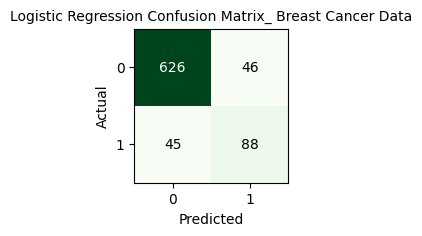

Accuracy (log_reg): 88.69565217391305 %


In [27]:
## confusion matrix plot
conf_mat = confusion_matrix(y_test,  y_pred_custom_log_reg )
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Logistic Regression Confusion Matrix_ Breast Cancer Data', fontsize = 10)
plt.show()
print('Accuracy (log_reg):', (metrics.accuracy_score(y_test, y_pred_custom_log_reg))*100, '%')

Adjusting the threshold from 0.5 to 0.3 seems to have a mixed impact on the model's performance.
Class 1 (positive class) recall increased, indicating that the model is capturing more of the actual positive instances.However, this improvement in recall comes at the cost of a decrease in precision for class 1, meaning that more false positives are predicted.

The choice of threshold should be based on the specific goals of our application. For example, identifying all cases of breast cancer is crucial (even if it means more false positives), the adjusted threshold might be appropriate.

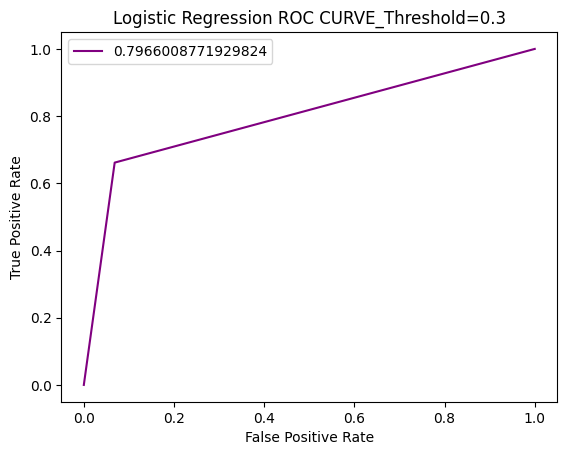

In [28]:
## Accuracy 
auc_LR = roc_auc_score(y_test, y_pred_custom_log_reg )
fpr, tpr, _ = roc_curve(y_test, y_pred_custom_log_reg )
plt.plot(fpr, tpr, color = 'purple', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC CURVE_Threshold=0.3')
plt.legend()
plt.show()

The change in thresholds has influenced how my model predicts the classes:

Threshold at 0.5:

Class 0 has 91% precision, meaning 91% of the predicted Class 0 instances are correct. It also has high recall (97%), finding 97% of the actual Class 0 instances.
Class 1 has lower precision (78%) and recall (53%), indicating that while it correctly identifies some Class 1 instances, it misses quite a few.
Threshold at 0.3:

Both Class 0 and Class 1 maintain the same precision, recall, and F1-scores as your initial model with threshold 0.5.
However, this adjustment might not have affected the model's performance significantly. The metrics remain consistent.
In essence, lowering the threshold might help improve the recall for Class 1, meaning the model will catch more of these instances, but it might also increase false positives. However, in this case, it seems that the adjustments didn't noticeably enhance the model's performance for Class 1; the changes remained consistent with the previous model's predictions, but as it is very crucial for us to catch the more positive cases we 'll choose the lower threshold.

#~~splitting the Train and test dataset into 80% and 20% / also combining all the features / and decreasing Threshold from 0.5 to 0.3 are the best choices to improve the model; means increasing Recall

## SVM Model  
## calculating accuracy for Linear, Sigmoid and Rbf       
SVM is effective when the data is high-dimensional and the number of features (attributes) is relatively large.•

In [29]:
## Create variables, columns 0 to 14 are the features and column 15 which is Statuse is our Target or dependent feature
x = bcan.iloc[:, 0:15]
y = bcan.iloc[:, 15]

In [30]:
from sklearn.model_selection import train_test_split

# Split your dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [31]:
## standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
## support vector machine
clflinear = svm.SVC(kernel = 'linear')
clfsigmoid = svm.SVC(kernel = 'sigmoid')
clfrbf = svm.SVC(kernel = 'rbf')

In [33]:

## for the model
clflinear.fit(x_train, y_train)
clfsigmoid.fit(x_train, y_train)
clfrbf.fit(x_train, y_train)

SVC()

In [34]:
# Set a custom threshold (e.g., 0.3)
custom_threshold = 0.3
y_pred_custom_linear = (y_probs >= custom_threshold).astype(int)
y_pred_custom_sigmoid = (y_probs >= custom_threshold).astype(int)
y_pred_custom_rbf = (y_probs >= custom_threshold).astype(int)

In [35]:
## make prediction

y_pred_linear = clflinear.predict(x_test)
y_pred_sigmoid = clfsigmoid.predict(x_test)
y_pred_rbf = clfrbf.predict(x_test)
custom_threshold = 0.3

In [36]:
## model evalution for SVM
print('Accuracy (linear):', (metrics.accuracy_score(y_test, y_pred_linear))*100, '%')
print('Accuracy (sigmoid):', (metrics.accuracy_score(y_test, y_pred_sigmoid))*100, '%')
print('Accuracy (rbf):', (metrics.accuracy_score(y_test, y_pred_rbf))*100, '%')


Accuracy (linear): 89.44099378881988 %
Accuracy (sigmoid): 81.49068322981367 %
Accuracy (rbf): 88.4472049689441 %


In [37]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       672
           1       0.82      0.47      0.59       133

    accuracy                           0.89       805
   macro avg       0.86      0.72      0.77       805
weighted avg       0.89      0.89      0.88       805



In [38]:
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       672
           1       0.44      0.44      0.44       133

    accuracy                           0.81       805
   macro avg       0.67      0.67      0.67       805
weighted avg       0.82      0.81      0.82       805



In [39]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       672
           1       0.86      0.36      0.51       133

    accuracy                           0.88       805
   macro avg       0.87      0.67      0.72       805
weighted avg       0.88      0.88      0.86       805



calculating the classificatio report for SVM

In [40]:
## This code is for whole SVM, and not separatelylinear, sigmoid, rbf
SVM = svm.SVC()
SVM.fit(x_train, y_train)
SVM_pred = SVM.predict(x_test)
custom_threshold = 0.3
print(classification_report(y_test,SVM_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       672
           1       0.86      0.36      0.51       133

    accuracy                           0.88       805
   macro avg       0.87      0.67      0.72       805
weighted avg       0.88      0.88      0.86       805



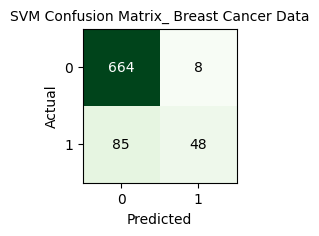

In [41]:
## confusion matrix plot
conf_mat = confusion_matrix(y_test,SVM_pred)
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('SVM Confusion Matrix_ Breast Cancer Data', fontsize = 10)
plt.show()

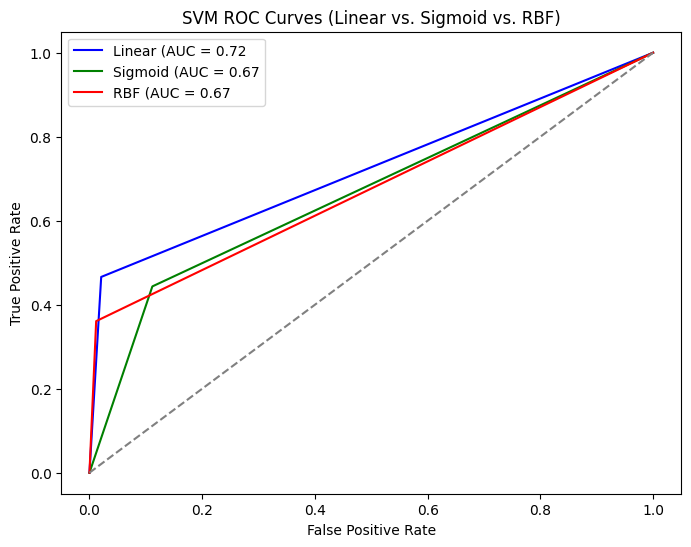

In [42]:
# Calculate ROC metrics for all three models
auc_linear = roc_auc_score(y_test, y_pred_linear)
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_pred_linear)

auc_sigmoid = roc_auc_score(y_test, y_pred_sigmoid)
fpr_sigmoid, tpr_sigmoid, _ = roc_curve(y_test, y_pred_sigmoid)

auc_rbf = roc_auc_score(y_test, y_pred_rbf)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_pred_rbf)

# Plot all three ROC curves on the same graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, color='blue', label=f'Linear (AUC = {auc_linear:.2f}')
plt.plot(fpr_sigmoid, tpr_sigmoid, color='green', label=f'Sigmoid (AUC = {auc_sigmoid:.2f}')
plt.plot(fpr_rbf, tpr_rbf, color='red', label=f'RBF (AUC = {auc_rbf:.2f}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curves (Linear vs. Sigmoid vs. RBF)')
plt.legend()
plt.show()

# SVM interpreting: 
The model shows strong performance in identifying Class 0 instances (negative class) with high precision and recall.
However, for Class 1 (positive class), while the precision is decent, the recall is notably lower, indicating that the model struggles to identify instances of Class 1, potentially leading to missed diagnoses or predictions for this class
Precision:
Class 0: 89% accurate in predicting true Class 0, but might mistakenly classify other classes as Class 0 about 11% of the time.
Class 1: 86% accurate in predicting true Class 1, but might misclassify other classes as Class 1 about 14% of the time.
Recall:
Class 0: Able to identify 99% of the actual Class 0 instances.
Class 1: Identifies only 36% of the actual Class 1 instances.


###  NAIVE BAYS GAUSSIAN                
%%  Naive Bays Model:Naive Bayes works well with categorical and discrete features.A simple and computationally efficient algorithm,

In [43]:
## create our naive bayes model
gaussian_model = GaussianNB()
## train our model
gaussian_model.fit(x_train, y_train)

GaussianNB()

In [44]:
# Set a custom threshold (e.g., 0.3)
custom_threshold = 0.3
y_pred_GaussianNB = (y_probs >= custom_threshold).astype(int)

In [45]:
## Make a prediction
y_pred_GaussianNB = gaussian_model.predict(x_test)

In [46]:
## create a dataframe for prediction
pd.DataFrame({'Actual Survived': y_test, 'Predicted Survived': y_pred_GaussianNB}).sample(10)

,Actual Survived,Predicted Survived
2618,0,0
3540,0,0
501,0,0
3078,0,0
3673,1,1
1071,0,0
366,0,0
1407,0,0
761,0,0
1398,0,0


In [47]:
## model evaluation forGaussianNB
accuracy_GaussianNB = accuracy_score(y_test, y_pred_GaussianNB)
print(accuracy_GaussianNB)


0.7913043478260869


In [48]:
conf_mat = confusion_matrix(y_test, y_pred_GaussianNB)
print(conf_mat)

[[574  98]
 [ 70  63]]


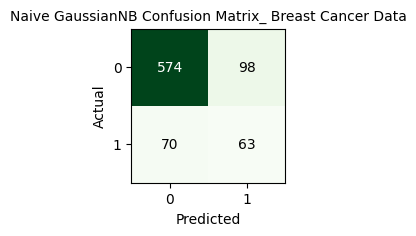

In [49]:
## confusion matrix plot
conf_mat = confusion_matrix(y_test, y_pred_GaussianNB)
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Naive GaussianNB Confusion Matrix_ Breast Cancer Data', fontsize = 10)
plt.show()

In [50]:
## classification report
print(classification_report(y_test,y_pred_GaussianNB))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       672
           1       0.39      0.47      0.43       133

    accuracy                           0.79       805
   macro avg       0.64      0.66      0.65       805
weighted avg       0.81      0.79      0.80       805



Class 0(Negative Class):Precision of 0.89 means that when the model predicts the negative class, it is correct 89% of the time. Class 1 (Positive Class): Precision of 0.39 indicates that when the model predicts the positive class, it is correct 38% of the time.
Recall (Sensitivity):
Class 0 (Negative Class): Recall of 0.85 means that the model correctly identifies 85% of the actual negative instances.
Class 1 (Positive Class): Recall of 0.47 indicates that the model captures 47% of the actual positive instances.
For the positive class, the F1-score is relatively low, suggesting an overall difficulty in achieving a balance between precision and recall for this class.


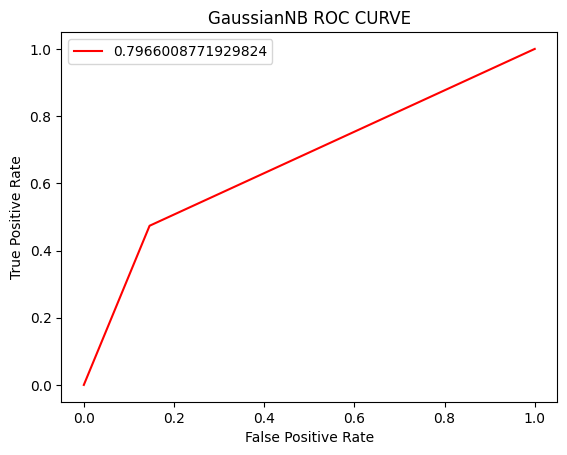

In [51]:
auc_GaussianNB = roc_auc_score(y_test, y_pred_GaussianNB)
fpr, tpr, _ = roc_curve(y_test, y_pred_GaussianNB)
plt.plot(fpr, tpr, color = 'RED', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB ROC CURVE')
plt.legend()
plt.show()

%% Naive Bays (Gaussian) accuracy = 79.13 %

The model seems to perform reasonably well for the negative class (Class 0), with high precision and recall.
However, the performance for the positive class (Class 1) is lower, with lower precision and recall, indicating challenges in correctly identifying positive instances.
The F1-score balances precision and recall, providing a single metric. For the positive class, the F1-score is relatively low, suggesting an overall difficulty in achieving a balance between precision and recall for this class.

## Decision Tree model for Breast Cancer Data

In [52]:
## splitting our data
## 80 % training 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [53]:
## standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
## create a decision tree with criterion Gini with no max depth
decision_tree_gini = DecisionTreeClassifier()

## create a decision tree with criterion Entropy with no max depth
decision_tree_entropy = DecisionTreeClassifier(criterion = 'entropy')

## criterion Gini with max depth of 3
decision_tree_depth = DecisionTreeClassifier(max_depth = 12)

In [55]:
# Set a custom threshold (e.g., 0.3)
custom_threshold = 0.3
y_pred_gini = (y_probs >= custom_threshold).astype(int)
y_pred_entropy = (y_probs >= custom_threshold).astype(int)
y_pred_depth = (y_probs >= custom_threshold).astype(int)

In [56]:
## Fitting the models
decision_tree_gini.fit(x_train, y_train)
decision_tree_entropy.fit(x_train, y_train)
decision_tree_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [57]:
## make prediction
y_pred_gini = decision_tree_gini.predict(x_test)
y_pred_entropy = decision_tree_entropy.predict(x_test)
y_pred_depth = decision_tree_depth.predict(x_test)


In [58]:
pd.DataFrame({'Actual Survival': y_test, 'Predicted Survival': y_pred_gini}).sample(5)

,Actual Survival,Predicted Survival
1995,1,1
1886,0,0
1592,0,0
166,0,0
410,0,1


In [59]:
pd.DataFrame({'Actual Survival': y_test, 'Predicted Survival': y_pred_entropy}).sample(5)

,Actual Survival,Predicted Survival
2936,0,0
1402,0,0
2641,0,0
551,0,1
2975,0,0


In [60]:
pd.DataFrame({'Actual Survival': y_test, 'Predicted Survival': y_pred_depth}).sample(5)

,Actual Survival,Predicted Survival
321,0,0
2944,0,0
463,1,0
1360,0,0
1055,0,0


In [61]:
## Model Evaluation
print('Accuracy (Gini):', (metrics.accuracy_score(y_test, y_pred_gini))*100, '%')
print('Accuracy (Entropy):', (metrics.accuracy_score(y_test, y_pred_entropy))*100, '%')
print('Accuracy (Max depth):', (metrics.accuracy_score(y_test, y_pred_depth))*100, '%')

Accuracy (Gini): 83.1055900621118 %
Accuracy (Entropy): 84.59627329192546 %
Accuracy (Max depth): 86.33540372670807 %


In [62]:
report_gini=classification_report(y_test, y_pred_gini)
print(report_gini)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       672
           1       0.49      0.57      0.53       133

    accuracy                           0.83       805
   macro avg       0.70      0.73      0.71       805
weighted avg       0.84      0.83      0.84       805



In [63]:
## classification report
report_gini=classification_report(y_test, y_pred_gini)
print(classification_report(y_test, y_pred_gini))
## classification report
print(classification_report(y_test, y_pred_entropy))
## classification report
print(classification_report(y_test, y_pred_depth))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       672
           1       0.49      0.57      0.53       133

    accuracy                           0.83       805
   macro avg       0.70      0.73      0.71       805
weighted avg       0.84      0.83      0.84       805

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       672
           1       0.53      0.62      0.57       133

    accuracy                           0.85       805
   macro avg       0.73      0.76      0.74       805
weighted avg       0.86      0.85      0.85       805

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       672
           1       0.60      0.54      0.57       133

    accuracy                           0.86       805
   macro avg       0.75      0.73      0.74       805
weighted avg       0.86      0.86      0.86       805



In [64]:
# Create a confusion matrix for each model
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
conf_matrix_depth = confusion_matrix(y_test, y_pred_depth)

In [65]:
print("Confusion Matrix for Gini:")
print(conf_matrix_gini)
print("\nConfusion Matrix for entropy:")
print(conf_matrix_entropy)
print("\nConfusion Matrix for depth:")
print(conf_matrix_depth)

Confusion Matrix for Gini:
[[593  79]
 [ 57  76]]

Confusion Matrix for entropy:
[[598  74]
 [ 50  83]]

Confusion Matrix for depth:
[[623  49]
 [ 61  72]]


In [66]:
combined_confusion_matrix = conf_matrix_gini + conf_matrix_entropy + conf_matrix_depth
print("\nCombined Confusion Matrix:")
print(combined_confusion_matrix)



Combined Confusion Matrix:
[[1814  202]
 [ 168  231]]


In [67]:
report_gini=classification_report(y_test, y_pred_gini)
report_entropy=classification_report(y_test, y_pred_entropy)
report_depth=classification_report(y_test, y_pred_depth)

In [68]:
combined_report = f"Combined Classification Report:\n\nGini:\n{report_gini}\n\nEntropy:\n{report_entropy}\n\ndepth:\n{report_depth}"
print(combined_report)

Combined Classification Report:

Gini:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       672
           1       0.49      0.57      0.53       133

    accuracy                           0.83       805
   macro avg       0.70      0.73      0.71       805
weighted avg       0.84      0.83      0.84       805


Entropy:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       672
           1       0.53      0.62      0.57       133

    accuracy                           0.85       805
   macro avg       0.73      0.76      0.74       805
weighted avg       0.86      0.85      0.85       805


depth:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       672
           1       0.60      0.54      0.57       133

    accuracy                           0.86       805
   macro avg       0.75      0.73      0.74       805
weighted avg     

# This code is for whole Decision tree, and not separately gini, entropy and Depth

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
## This code is for whole Decision tree, and not separately gini, entropy and Depth
# Create a Decision Tree Classifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
DT_pred = DT.predict(x_test)

print(classification_report(y_test, DT_pred))


              precision    recall  f1-score   support

           0       0.92      0.89      0.90       672
           1       0.51      0.59      0.55       133

    accuracy                           0.84       805
   macro avg       0.71      0.74      0.72       805
weighted avg       0.85      0.84      0.84       805



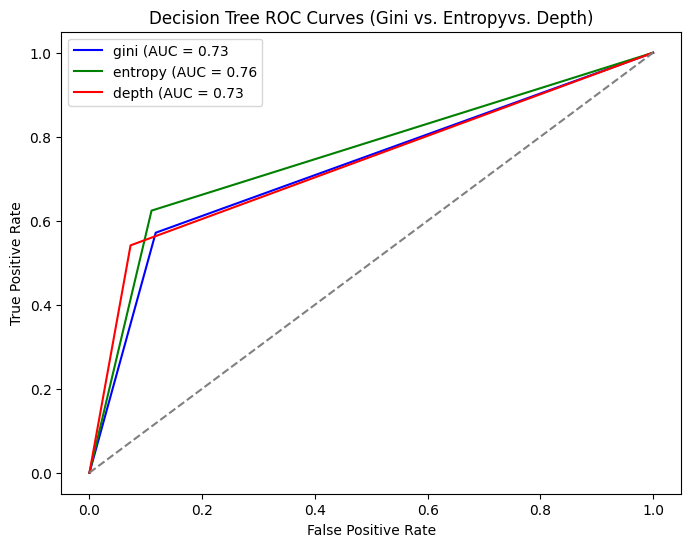

In [70]:

# Calculate ROC metrics for all three models
auc_gini = roc_auc_score(y_test, y_pred_gini)
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)

auc_entropy = roc_auc_score(y_test, y_pred_entropy)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)

auc_depth = roc_auc_score(y_test, y_pred_depth)
fpr_depth, tpr_depth, _ = roc_curve(y_test, y_pred_depth)

# Plot all three ROC curves on the same graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_gini, tpr_gini, color='blue', label=f'gini (AUC = {auc_gini:.2f}')
plt.plot(fpr_entropy, tpr_entropy, color='green', label=f'entropy (AUC = {auc_entropy:.2f}')
plt.plot(fpr_depth, tpr_depth, color='red', label=f'depth (AUC = {auc_depth:.2f}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curves (Gini vs. Entropyvs. Depth)')
plt.legend()
plt.show()

Decision Tree:

Gini:
Precision: 91% for Class 0, 51% for Class 1.
Recall: 89% for Class 0, 57% for Class 1.
F1-Score: 90% for Class 0, 54% for Class 1.
Conclusion: Good at correctly identifying Class 0 but less accurate for Class 1.
Entropy:

Precision: 92% for Class 0, 55% for Class 1.
Recall: 90% for Class 0, 62% for Class 1.
F1-Score: 91% for Class 0, 58% for Class 1.
Conclusion: Similar to Gini, better at Class 0 than Class 1.
Depth:

Precision: 91% for Class 0, 57% for Class 1.
Recall: 92% for Class 0, 53% for Class 1.
F1-Score: 91% for Class 0, 55% for Class 1.
Conclusion: Performs similarly to Gini and Entropy, stronger for Class 0.
In summary, across different configurations:

All variations are good at identifying Class 0 with high precision and recall.
Class 1 identification is weaker across the board, with lower precision and recall.
The models generally perform better for Class 0 than Class 1.
Consider the trade-offs between precision and recall based on the specific needs of your application when choosing a model. If correctly identifying Class 1 is crucial, 

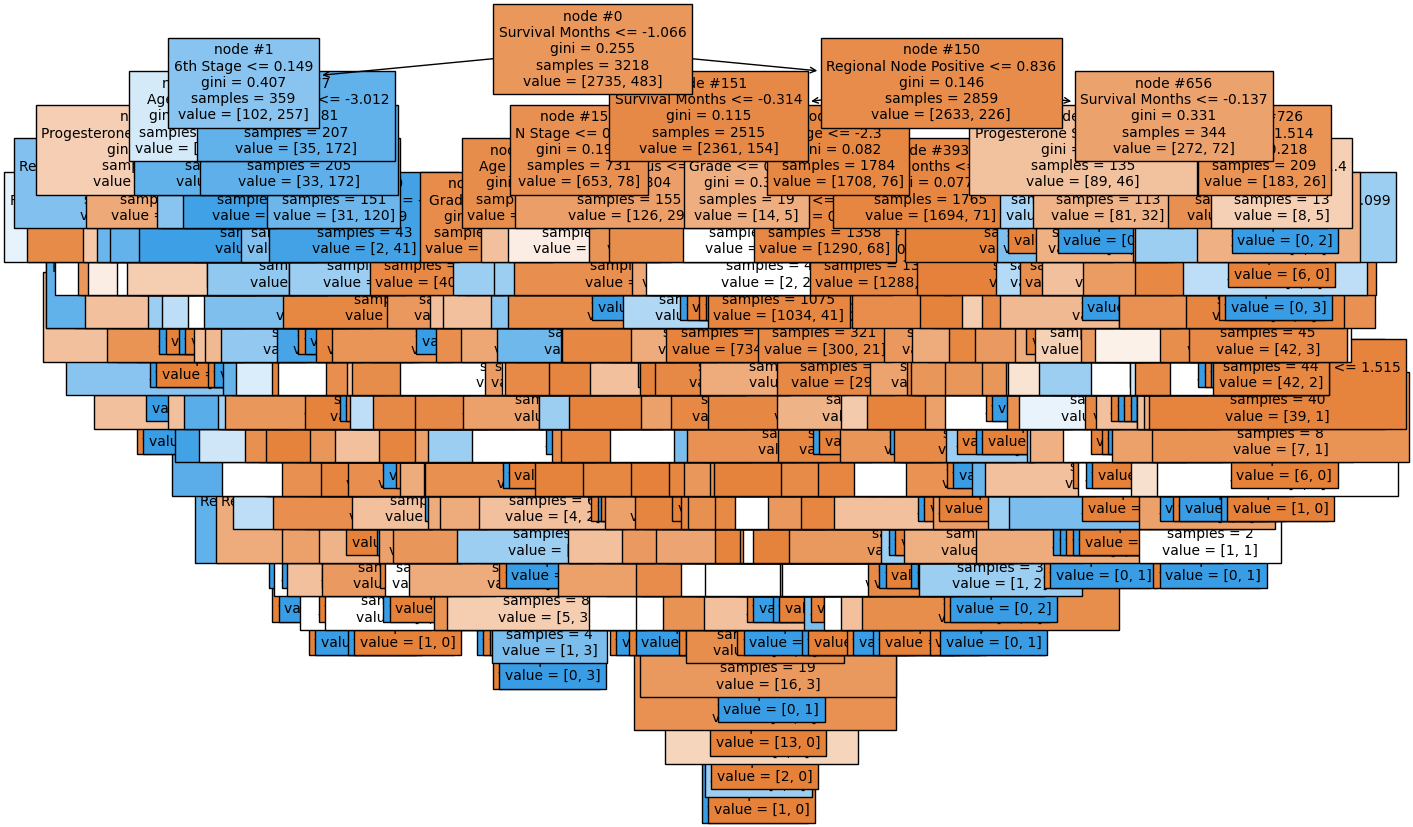

In [71]:
import matplotlib.pyplot as plt
from sklearn import tree
bcan_treemodel = DecisionTreeClassifier(random_state=1)
# Define your feature names in a list
feature_names = [
    'Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
    'Differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
    'Progesterone Status', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months'
]
bcan_treemodel.fit(x_train, y_train)
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    bcan_treemodel,
    feature_names=feature_names,
    filled=True,
    fontsize=10,
    node_ids=True,
    class_names=None
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()


A try to draw the Decision Tree 

In [72]:
import numpy as np

# Assuming x_train is a NumPy array
selected_features = [
    'Age', 'Differentiate', 'Grade', 'Tumor Size', 'Survival Months'
]

# Find the column indices for the selected features
feature_names = [
    'Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
    'Differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
    'Progesterone Status', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months'
]

selected_indices = [feature_names.index(feature) for feature in selected_features]

# Filter the training data to include only selected features
x_train_selected = x_train[:, selected_indices]


In [73]:
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree Classifier
bcan_dtmodel = DecisionTreeClassifier(random_state=42)

# Train the model using the filtered training data
bcan_dtmodel.fit(x_train_selected, y_train)


DecisionTreeClassifier(random_state=42)

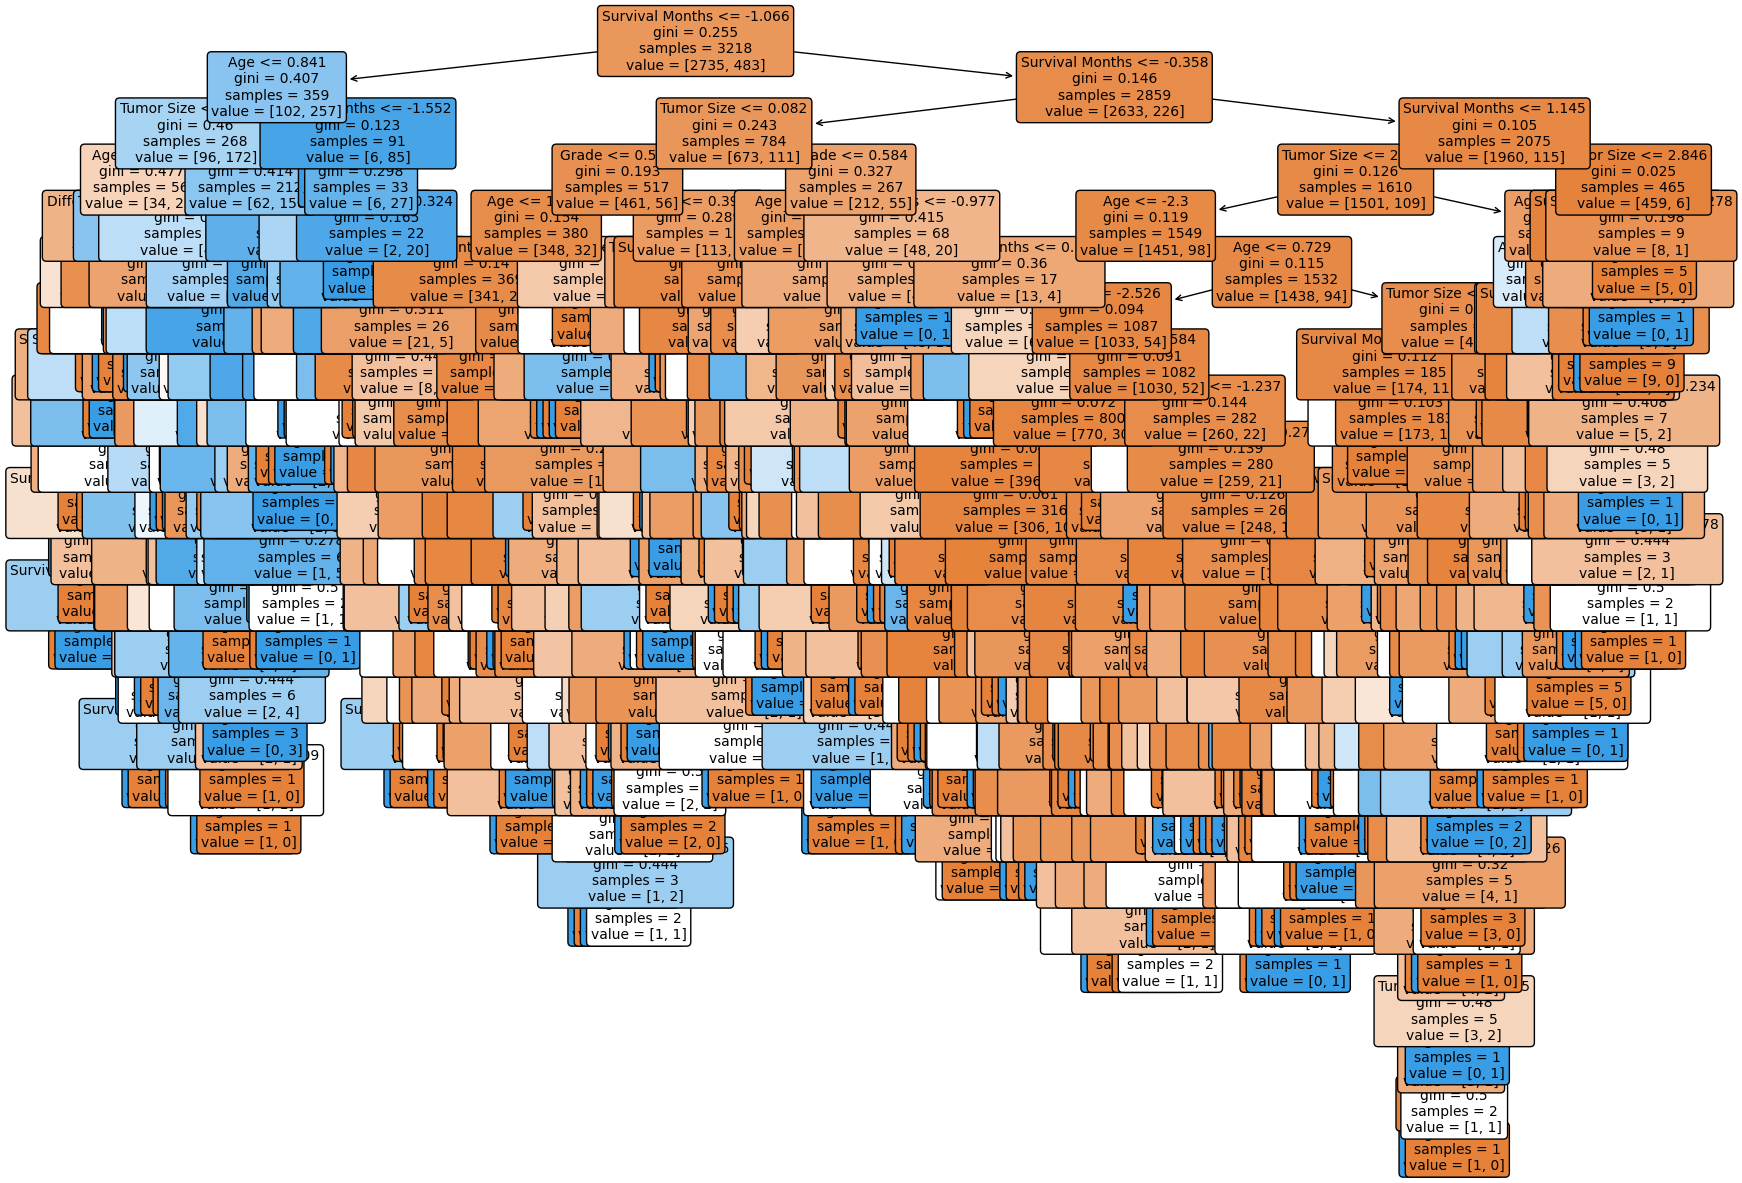

In [74]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming bcan_model is your trained Decision Tree Classifier

plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
plot_tree(
    bcan_dtmodel,
    feature_names=selected_features,  # Use your selected feature names here
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


## Random Forest Model

In [75]:
## splitting our data
## 80 % training 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [76]:
## standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [77]:
## Create a random forest classifier
random_forest = RandomForestClassifier()

## Use grid search to find the best hyperparameters
param_grid = { 
    'n_estimators': [25, 50, 100, 150, 200], 
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
} 

grid_search = GridSearchCV(random_forest, param_grid = param_grid)

grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=9, n_estimators=200)


In [78]:
# Initialize the Random Forest Classifier without specifying any hyperparameters.
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8)

# Train the Random Forest Classifier
random_forest.fit(x_train, y_train)


RandomForestClassifier(max_depth=8, random_state=42)

In [79]:
# Make predictions on the test set
y_pred_RF = random_forest.predict(x_test)

## create a dataframe for prediction
pd.DataFrame({'Actual': y_test, 'Predited':y_pred_RF}).sample(10)

,Actual,Predited
2727,0,0
222,1,1
2172,0,0
897,1,1
3495,0,0
2618,0,0
3783,0,0
952,0,0
1278,0,0
2290,0,0


In [80]:
## model evaluation
accuracy_RF= accuracy_score(y_test, y_pred_RF )

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_RF)

print('Accuracy_RF', (metrics.accuracy_score(y_test, y_pred_RF))*100, '%')
print(accuracy_RF)
print(conf_mat)


Accuracy_RF 90.80745341614906 %
0.9080745341614906
[[659  13]
 [ 61  72]]


In [81]:
## classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       672
           1       0.85      0.54      0.66       133

    accuracy                           0.91       805
   macro avg       0.88      0.76      0.80       805
weighted avg       0.90      0.91      0.90       805



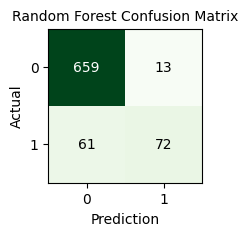

In [82]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Random Forest Confusion Matrix', fontsize = 10)
plt.show()

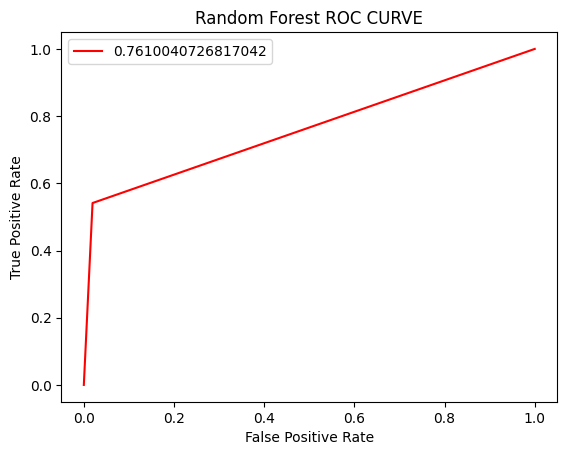

In [83]:
auc_RF = roc_auc_score(y_test, y_pred_RF)
fpr, tpr, _ = roc_curve(y_test, y_pred_RF)
plt.plot(fpr, tpr, color = 'RED', label = auc_RF)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC CURVE')
plt.legend()
plt.show()

%%% Random Forest: the conditions with max_depth = 8 and n_estimators = 100 consistently exhibited better performance, indicating that this configuration was the optimized format for the model.
659 instances of Class 0 were correctly classified.
72 instances of Class 1 were correctly classified.
13 instances of Class 0 were wrongly classified as Class 1.
61 instances of Class 1 were wrongly classified as Class 0.

Precision: 92% for Class 0 (healthy), 85% for Class 1 (cancer).
Recall: 98% for Class 0, 54% for Class 1.
F1-Score: 95% for Class 0, 66% for Class 1.
Accuracy: Overall accuracy is 91%.
Conclusion:
Excellent performance in identifying Class 0 with high precision and recall.
Slightly lower performance for Class 1, with relatively lower recall but decent precision.
Overall good accuracy, especially in identifying healthy cases (Class 0).


# ANN Model

In [84]:
## Create variables, columns 0 to 14 are the features and column 15 which is Statuse is our Target or dependent feature
X = bcan.iloc[:, 0:15]
y = bcan.iloc[:, 15]

In [85]:
## splitting our data
## 80 % training 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [86]:
## standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
X_train

array([[ 0.78511196,  0.39468265, -0.3553561 , ...,  0.70813138,
        -0.61638544, -0.99957112],
       [ 1.12164827,  0.39468265, -0.3553561 , ..., -1.40183786,
        -0.61638544, -0.11515543],
       [-0.11231821, -3.1880783 ,  1.5239141 , ...,  0.08755219,
         0.35175608,  0.54815634],
       ...,
       [-1.23410592,  0.39468265, -0.3553561 , ...,  0.08755219,
         0.15812778,  0.68081869],
       [ 1.45818458,  0.39468265, -0.3553561 , ..., -0.65714284,
        -0.42275714,  0.9461434 ],
       [-0.11231821, -1.39669783, -0.3553561 , ...,  1.08047889,
        -0.42275714, -0.99957112]])

In [88]:
y_train

2665    0
3296    0
2138    0
1419    0
283     0
       ..
1130    1
1294    0
860     0
3508    0
3175    0
Name: Status, Length: 3218, dtype: int64

In [89]:
## Initialize the model of neural network
Ann = Sequential()

In [90]:
## input layers---unit is the number of neurons,
Ann.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu',input_dim = 15))

In [91]:
## hidden layers, the first neuron was  16so the second layer we make it half =8 and we don't need input_dim
##I tried different units and the best ones was 64 and  which gave me max accuracy
Ann.add(Dense(units= 32, kernel_initializer = 'uniform', activation = 'relu'))

In [92]:
## regularization--which help us to stop overfitting- we need to select the percentage of dropout like 25%
Ann.add(Dropout(0.25))

In [93]:
# the activation also will change from relu to sigmoid( because it is binary and the result is 0 and 1)
Ann.add(Dense(units= 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [94]:
Ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [95]:
Ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
from tensorflow.keras import callbacks

# Rest of your code
# ...

# Initializing early stopping callback
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=10,
                                        restore_best_weights=True)

In [97]:
## train the network--train the data batch by batch, based on experiment here =32
## epochs, need to be careful if it is small it will be underfitting if it high may be overfitting 
## for validation data we may use test data sometime we use validation split not only test set
## we can say validation_split =(x-test, y_test) or some percent of whole sample
history = Ann.fit(X_train, y_train, batch_size = 25, epochs = 100, validation_split = 0.25)

Epoch 1/100




97/97 [==============================] - 2s 5ms/step - loss: 0.5322 - accuracy: 0.8413 - val_loss: 0.3229 - val_accuracy: 0.8671
Epoch 2/100
97/97 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8765 - val_loss: 0.2796 - val_accuracy: 0.9043
Epoch 3/100
97/97 [==============================] - 0s 3ms/step - loss: 0.2999 - accuracy: 0.8931 - val_loss: 0.2731 - val_accuracy: 0.9081
Epoch 4/100
97/97 [==============================] - 0s 3ms/step - loss: 0.2903 - accuracy: 0.8927 - val_loss: 0.2733 - val_accuracy: 0.9068
Epoch 5/100
97/97 [==============================] - 0s 3ms/step - loss: 0.2895 - accuracy: 0.8968 - val_loss: 0.2740 - val_accuracy: 0.9056
Epoch 6/100
97/97 [==============================] - 0s 3ms/step - loss: 0.2865 - accuracy: 0.8935 - val_loss: 0.2750 - val_accuracy: 0.9056
Epoch 7/100
97/97 [==============================] - 0s 3ms/step - loss: 0.2837 - accuracy: 0.9005 - val_loss: 0.2741 - val_accuracy: 0.9093
Epoch 8/100
97/97 [====

In [98]:
## Save my model--- give it a name
Ann.save('Breast_cancer_Annmodel.h5')

In [99]:
##Load saved model-we want to see our saved model
Ann = tf.keras.models.load_model('Breast_cancer_Annmodel.h5')

In [100]:
##now we need to prediction like the other models
## model prediction on the test data---before we just said model predict but here has been save in a file so we 
y_pred_Ann= Ann.predict(X_test)


26/26 [==============================] - 0s 2ms/step


In [101]:
## set a threshold-- we need to put it in this variable....
y_pred_Ann= np.where(y_pred_Ann > 0.3, 1, 0)  ## if it is bigger than 0.5 put 1 , else put 0
print(y_pred_Ann[:10])  # Display the first 10 elements of y_pred_Annbcan


[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [102]:
y_test
print(y_test[:10])

1718    0
1204    1
2722    0
1937    0
1226    1
465     0
3573    0
551     0
838     0
3999    0
Name: Status, dtype: int64


In [103]:
y_pred_Ann.shape

(805, 1)

In [104]:
y_test.shape

(805,)

In [105]:
##we need to flatten ---inserting the changes in them , we don't use the new name it will be confuesing
y_pred_Ann = y_pred_Ann.flatten()

In [106]:
### put them in datafram
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_Ann}).sample(10)

,Actual,Predicted
4009,0,0
1263,1,1
3274,0,0
438,0,1
393,0,0
1727,0,0
682,0,0
3631,1,1
3461,0,0
1270,0,0


In [107]:
## classification report
print(classification_report(y_test, y_pred_Ann))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       672
           1       0.67      0.59      0.63       133

    accuracy                           0.88       805
   macro avg       0.80      0.76      0.78       805
weighted avg       0.88      0.88      0.88       805



In [108]:
## model evaluation
accuracy_Ann = accuracy_score(y_test, y_pred_Ann)
## model evaluation
print('Accuracy (Ann):', (metrics.accuracy_score(y_test, y_pred_Ann))*100, '%')
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_Ann)

print(accuracy_Ann)
print(conf_mat)

Accuracy (Ann): 88.4472049689441 %
0.884472049689441
[[634  38]
 [ 55  78]]


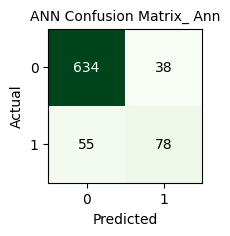

In [109]:
## confusion matrix plot
conf_mat = confusion_matrix(y_test, y_pred_Ann)
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('ANN Confusion Matrix_ Ann', fontsize = 10)
plt.show()

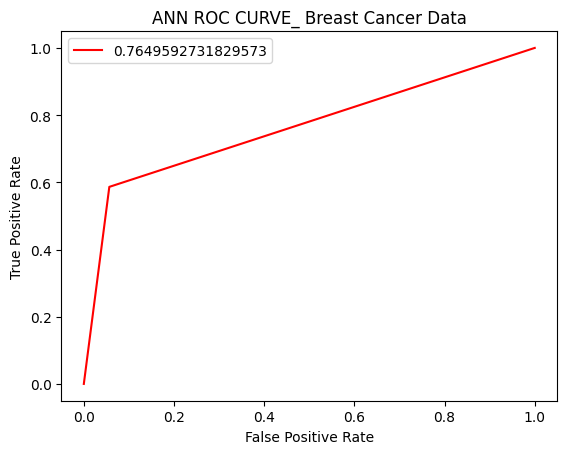

In [110]:
auc_Ann= roc_auc_score(y_test, y_pred_Ann)
fpr, tpr, _ = roc_curve(y_test, y_pred_Ann)
plt.plot(fpr, tpr, color = 'Red', label = auc_Ann)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC CURVE_ Breast Cancer Data')
plt.legend()
plt.show()

~ Comparing all the models/ This one just wanted to do for fun, we really don't need this but as it is too big and have so many so many values to unpack doesn't work 

fpr_log, tpr_log = roc_curve(y_test, y_pred_log)[0:2]

fpr_GaussianNB, tpr_GaussianNB = roc_curve(y_test, y_pred_GaussianNB)[0:2]

fpr_SVM, tpr_SVM = roc_curve(y_test, SVM_pred)[0:2]

fpr_DT, tpr_DT = roc_curve(y_test, DT_pred)

fpr_Ann, tpr_Ann = roc_curve(y_test, y_pred_Ann)[0:2]

fpr_RF, tpr_RF = roc_curve(y_test, y_pred_RF)

cba = []
predictions = [y_pred_Ann, y_pred_log, y_pred_GaussianNB, SVM_pred, DT_pred, y_pred_RF ]
for i in predictions:
    cba.append(roc_auc_score(y_test, i))

plt.plot(fpr_Ann, tpr_Ann , label=f"Ann ({cba[0]:.4f})")
plt.plot(fpr_log, tpr_log, label=f"log-Reg ({cba[1]:.4f})")
plt.plot(fpr_GaussianNB, tpr_GaussianNB , label=f"NB ({cba[2]:.4f})")
plt.plot(fpr_DT, tpr_DT, label=f"DT ({cba[3]:.4f})")
plt.plot(fpr_Ann, tpr_RF , label=f"RF ({cba[0]:.4f})")
plt.plot(fpr_SVM, tpr_SVM , label=f"SVM ({cba[0]:.4f})")
plt.xlabel("False positive (Breast Cancer) rate")
plt.ylabel("True positive (Breast Cancer) rate")
plt.legend()
plt.show()